<a href="https://colab.research.google.com/github/RachelRamirez/FashionMNIST_DataAugmentation/blob/main/fashion_mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [56]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

## Prepare the data

In [47]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train[0:2000]
y_train = y_train[0:2000]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build the model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Train the model

In [6]:
batch_size = 50
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.7)

Epoch 1/15
12/12 [==============================] - 2s 94ms/step - loss: 2.2060 - accuracy: 0.2650 - val_loss: 2.0387 - val_accuracy: 0.5029
Epoch 2/15
12/12 [==============================] - 1s 84ms/step - loss: 1.8576 - accuracy: 0.4450 - val_loss: 1.5053 - val_accuracy: 0.6193
Epoch 3/15
12/12 [==============================] - 1s 82ms/step - loss: 1.3748 - accuracy: 0.5567 - val_loss: 1.0485 - val_accuracy: 0.6257
Epoch 4/15
12/12 [==============================] - 1s 86ms/step - loss: 1.0750 - accuracy: 0.6117 - val_loss: 0.8685 - val_accuracy: 0.6936
Epoch 5/15
12/12 [==============================] - 1s 78ms/step - loss: 0.9541 - accuracy: 0.6467 - val_loss: 0.8104 - val_accuracy: 0.7036
Epoch 6/15
12/12 [==============================] - 1s 74ms/step - loss: 0.8186 - accuracy: 0.7017 - val_loss: 0.7539 - val_accuracy: 0.7379
Epoch 7/15
12/12 [==============================] - 1s 74ms/step - loss: 0.7800 - accuracy: 0.7333 - val_loss: 0.7240 - val_accuracy: 0.7479
Epoch 8/15
12

## Evaluate the trained model

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6246284246444702
Test accuracy: 0.7716000080108643


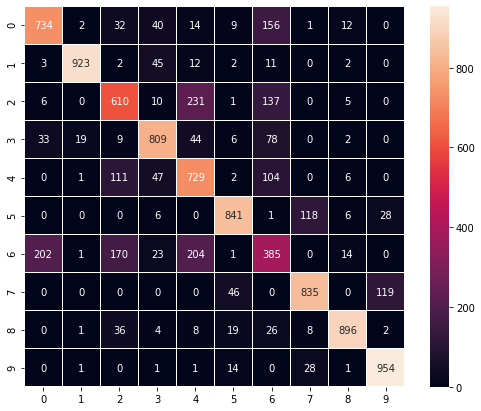

In [57]:
#predictions = model.predict(x_test)
#predictions = np.argmax(predictions, axis=1)
 
#y_test = np.argmax(y_test, axis=1) 

confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


ValueError: ignored

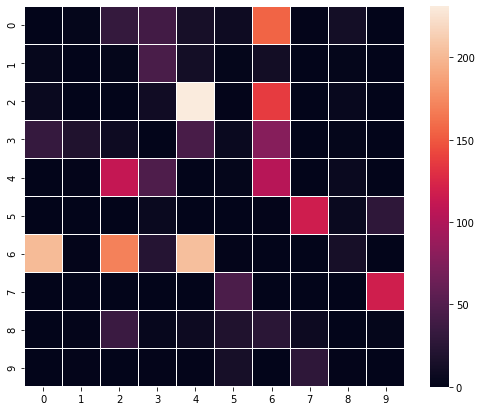

In [91]:
## I want to pick the largest value on the confusion matrix not on the diagonal
confusing_part_matrix= np.array(confusion_matrix)-np.identity(confusion_matrix.shape[0])*np.diag(confusion_matrix)

confusing_part_matrix = tf.convert_to_tensor(confusing_part_matrix)


f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusing_part_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


## find the max value of those remaining numbers
thisnumber=np.max(confusing_part_matrix)
x_thisnumber=np.argmax(confusing_part_matrix,axis=0)
y_thisnumber=np.argmax(confusing_part_matrix,axis=1)
display(x_thisnumber,y_thisnumber)
#print("The worst the algorithm did is between " confus)
confusing_part_matrix[thisnumber]

In [90]:
confusing_part_matrix[0]

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([  0.,   2.,  32.,  40.,  14.,   9., 156.,   1.,  12.,   0.])>